Create a contour plot in python which scans through x-axis (domestic renewable share) and y-axis (hydrogen export volume).  In the z-axis there is a synergy/conflict indicator called domestic average system costs

In [1]:
OUTPUT='/mnt/c/Users/scl38887/Documents/git/aldehyde/results/fix_co2/graphics/integrated_comp/'

### Real data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Get the data
data = pd.read_csv('/mnt/c/Users/scl38887/Documents/git/aldehyde/results/fix_co2/integrated_comp/stats.csv')


In [4]:

# Prepare the data
# Extract the Co2L which is in position 5-8
data["opts"] = data["opts"].str[4:]

#Rescale the cost from euro to B€
data["cost"] = (data["cost"]/1e9).round(2)

#Round the LCOH to 2 decimals
data["lcoh"] = data["lcoh"].round(2)

In [5]:
data.head(15)

,h2export,opts,cost,lcoh
0,0,1.0,5.37,NaN
1,20,1.0,6.45,53.92
2,40,1.0,7.55,54.26
3,60,1.0,8.65,54.42
4,80,1.0,9.75,54.53
5,100,1.0,10.85,54.60
6,120,1.0,11.95,54.67
7,140,1.0,13.06,54.79
8,160,1.0,14.20,55.02
9,180,1.0,15.38,55.47


In [6]:

# Delete rows where ops is Nan
#data = data.dropna()
data.head()

,h2export,opts,cost,lcoh
0,0,1.0,5.37,NaN
1,20,1.0,6.45,53.92
2,40,1.0,7.55,54.26
3,60,1.0,8.65,54.42
4,80,1.0,9.75,54.53


In [7]:
# Shape the data in a way that is suitable for contour plotting
# First, get the unique values of the two parameters
h2export = np.unique(data['h2export'])
opts = np.unique(data['opts'].fillna(100).astype(float))
# Then, create a meshgrid of the two parameters
#X, Y = np.meshgrid(x, y) # Not necessary

In [8]:
# Finally, create a matrix of the cost values for each combination of parameters
cost = data['cost'].values.reshape(len(opts), len(h2export)).T
lcoh = data['lcoh'].values.reshape(len(opts), len(h2export)).T


In [9]:
cost

array([[ 5.37,  5.53,  5.97,  6.49,  7.03,  7.56,  8.1 ,  8.64,  9.8 ,
         9.72],
       [ 6.45,  6.52,  6.99,  7.52,  8.05,  8.58,  9.12,  9.65, 10.8 ,
        10.72],
       [ 7.55,  7.63,  8.11,  8.63,  9.16,  9.69, 10.22, 10.76, 11.91,
        11.83],
       [ 8.65,  8.75,  9.22,  9.74, 10.27, 10.8 , 11.33, 11.87, 13.02,
        12.94],
       [ 9.75,  9.87, 10.34, 10.85, 11.38, 11.91, 12.44, 12.98, 14.13,
        14.05],
       [10.85, 10.99, 11.46, 11.96, 12.49, 13.02, 13.55, 14.08, 15.23,
        15.15],
       [11.95, 12.12, 12.57, 13.07, 13.6 , 14.13, 14.66, 15.19, 16.34,
        16.26],
       [13.06, 13.24, 13.7 , 14.19, 14.72, 15.25, 15.78, 16.32, 17.46,
        17.38],
       [14.2 , 14.42, 14.88, 15.38, 15.9 , 16.43, 16.96, 17.49, 18.64,
        18.56],
       [15.38, 15.64, 16.1 , 16.6 , 17.13, 17.65, 18.18, 18.72, 19.86,
        19.78],
       [16.61, 16.89, 17.34, 17.84, 18.36, 18.89, 19.42, 19.95, 21.1 ,
        21.02]])

In [10]:

# Flip the x dimension (opts)
# cost = np.flip(cost, axis=1)
# lcoh = np.flip(lcoh, axis=1)
# opts = np.flip(opts, axis=0)

In [11]:
opts

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [12]:
opts_reverse = 1-opts

In [13]:
opts_reverse*100

array([90., 80., 70., 60., 50., 40., 30., 20., 10.,  0.])

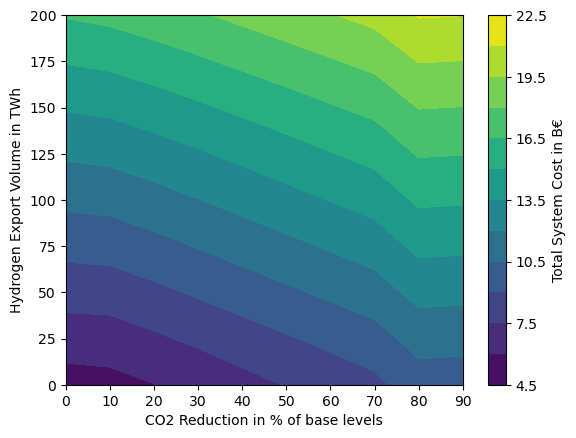

In [22]:
# Plot a contour plot of the data having the y-axis the column "h2export", x-axis the column "sopts", and the z-axis the column "cost"
levels = 10
plt.contourf(opts_reverse*100,h2export,np.flip(cost, axis=1), levels=levels)
plt.xlabel('CO2 Reduction in % of base levels')
plt.ylabel('Hydrogen Export Volume in TWh')
plt.colorbar().set_label('Total System Cost in B€')

# Save the plot
plt.savefig(OUTPUT+'contour_plot_totalsystemcost_levels'+ str(levels) + '.pdf', bbox_inches='tight')

plt.show()

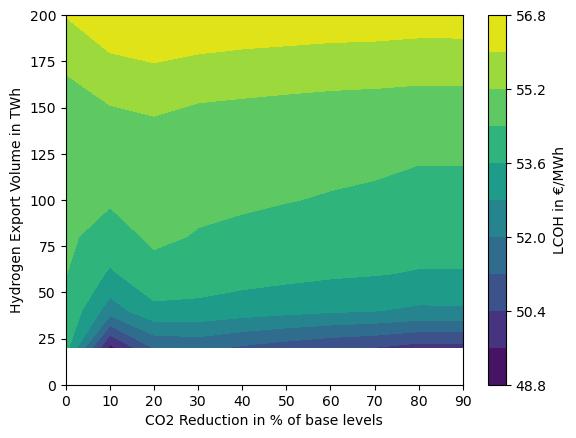

In [23]:
# Plot a contour plot of the data having the y-axis the column "h2export", x-axis the column "sopts", and the z-axis the column "lcoh"
levels = 10
plt.contourf(opts_reverse*100,h2export,np.flip(lcoh, axis=1), levels=10)

plt.xlabel('CO2 Reduction in % of base levels')
plt.ylabel('Hydrogen Export Volume in TWh')
plt.colorbar().set_label('LCOH in €/MWh')

# Save the plot
plt.savefig(OUTPUT+'contour_plot_lcoh_levels'+ str(levels) + '.pdf', bbox_inches='tight')

plt.show()

### Dummy data: Single plot

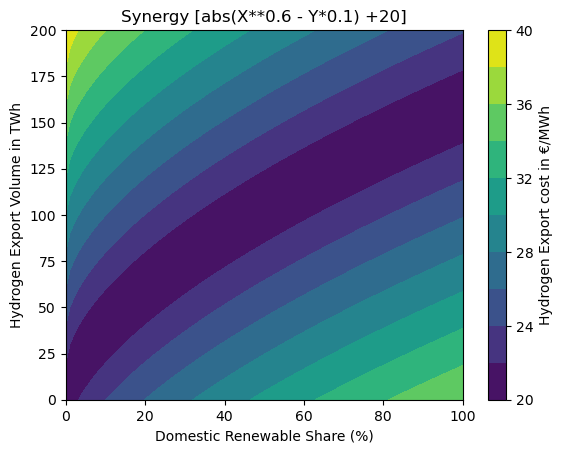

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define x and y axis data
x = np.linspace(0, 100, num=100)
y = np.linspace(0, 200, num=100)

# Generate grid for x and y data
X, Y = np.meshgrid(x, y)

# Define the z-axis data, this is just a dummy example
Z = abs(X**0.6 - Y*0.1) +20

# Plot the contour plot
plt.contourf(X, Y, Z, levels=10)
plt.xlabel('Domestic Renewable Share (%)')
plt.ylabel('Hydrogen Export Volume in TWh')
plt.title('Synergy [abs(X**0.6 - Y*0.1) +20]')
plt.colorbar().set_label('Hydrogen Export cost in €/MWh')

# Save the plot
plt.savefig(OUTPUT+'contour_plot_dummy.pdf', bbox_inches='tight')

plt.show()


### Dummay Data: Subplots

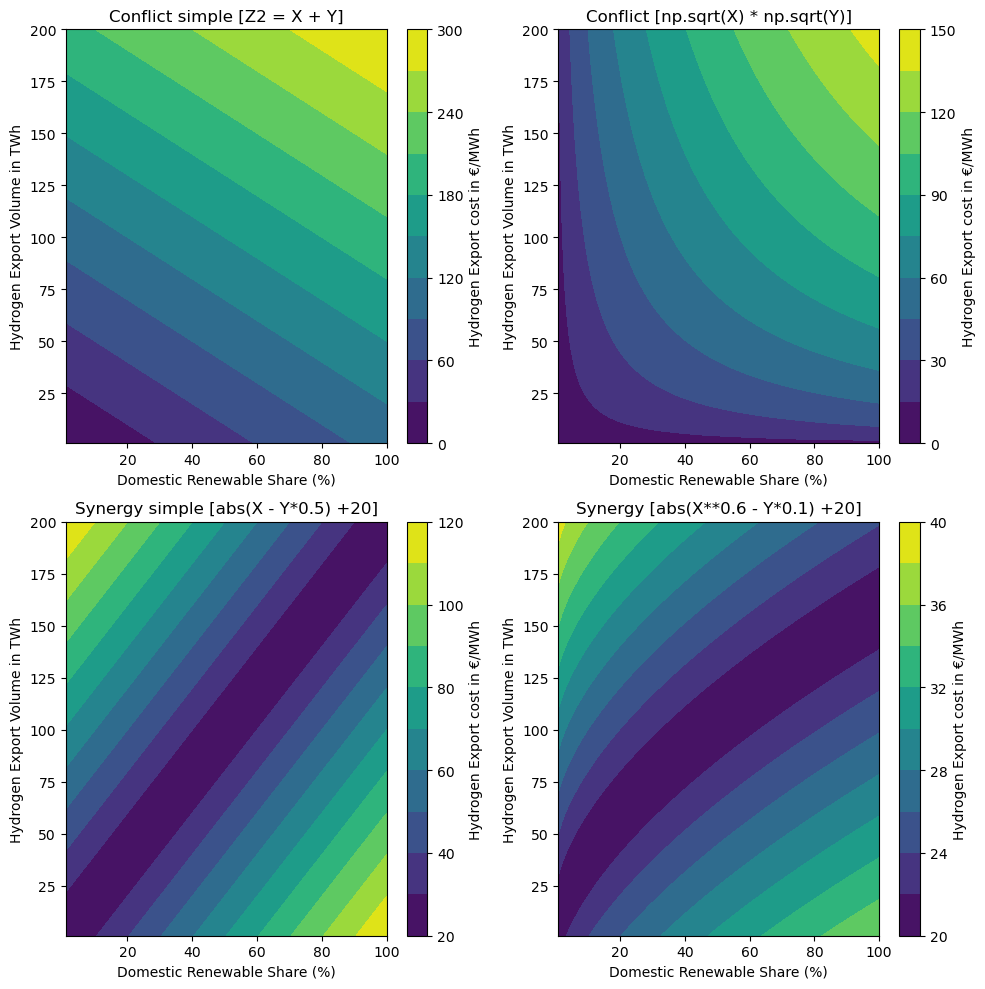

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define x and y axis data. Start from 1 to avoid devision by zero
x = np.linspace(1, 100, num=100)
y = np.linspace(1, 200, num=100)

# Generate grid for x and y data
X, Y = np.meshgrid(x, y)

# Define the z-axis data, this is just a dummy example
Z1 = X + Y 
Z2 = np.sqrt(X) * np.sqrt(Y) 
Z3 = abs(X - Y*0.5) +20
Z4 = abs(X**0.6 - Y*0.1) +20

# Plot the 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
cax1 = axs[0, 0].contourf(X, Y, Z1, levels=10)
axs[0, 0].set_title('Conflict simple [Z2 = X + Y]')
cax2 = axs[0, 1].contourf(X, Y, Z2, levels=10)
axs[0, 1].set_title('Conflict [np.sqrt(X) * np.sqrt(Y)]')
cax3 = axs[1, 0].contourf(X, Y, Z3, levels=10)
axs[1, 0].set_title('Synergy simple [abs(X - Y*0.5) +20]')
cax4 = axs[1, 1].contourf(X, Y, Z4, levels=10)
axs[1, 1].set_title('Synergy [abs(X**0.6 - Y*0.1) +20]')

# Add colorbars
fig.colorbar(cax1, ax=axs[0, 0]).set_label('Hydrogen Export cost in €/MWh')
fig.colorbar(cax2, ax=axs[0, 1]).set_label('Hydrogen Export cost in €/MWh')
fig.colorbar(cax3, ax=axs[1, 0]).set_label('Hydrogen Export cost in €/MWh')
fig.colorbar(cax4, ax=axs[1, 1]).set_label('Hydrogen Export cost in €/MWh')

for ax in axs.flat:
    ax.set(xlabel='Domestic Renewable Share (%)', ylabel='Hydrogen Export Volume in TWh')

plt.tight_layout()
plt.savefig(OUTPUT+'contour_plot_dummy_subplots.pdf')
plt.show()
